## *Used Car Price Prediction | XGBoost & LightGBM Regression | S4E9*

![](https://www.kaggle.com/competitions/76728/images/header)

# *🚗 Used Car Price Prediction* 
### *Playground Series S4E9 – Regression*

## *📌 Problem Statement*
This competition aims to predict the selling price of used cars based on structured vehicle features.

Target variable:
- **price** (continuous)

Evaluation metric:
- **RMSE (Root Mean Squared Error)**

---

## *🧠 Project Pipeline*

1. Data Cleaning  
2. Missing Value Handling  
3. Feature Engineering  
4. Model Comparison (Baseline Models)  
5. XGBoost Optimization  
6. Final Model Training  
7. Submission File Generation  

---

## *🔍 Feature Engineering Highlights*

- Extracted **horsepower** from engine column
- Created **car_age**
- Created **milage_per_year**
- Applied log transformation to target variable

---

## *🏆 Best Model*
**XGBoost Regressor**

Cross-Validated RMSE: ~0.49

---

Let's build a strong regression model 🚀


## *Import*

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 55)  
# Pandas DataFrame çıktılarında tüm sütunların görünmesini sağlar.

import warnings
warnings.filterwarnings('ignore')  
# Uyarıları gizler, böylece kod çalışırken kullanıcıyı rahatsız etmez.

from sklearn.linear_model import LinearRegression, Ridge, Lasso
# LinearRegression: Doğrusal regresyon modelini kullanır.
# Ridge: L2 regularizasyonu ile doğrusal regresyon.
# Lasso: L1 regularizasyonu ile doğrusal regresyon.

from sklearn.model_selection import train_test_split
# Veriyi eğitim ve test setlerine ayırır.

from sklearn.metrics import r2_score, mean_squared_error
# r2_score: Modelin açıklama gücünü ölçer.
# mean_squared_error: Modelin hata oranını ölçer, kareler ortalaması hatası.

import numpy as np  # NumPy, matematiksel ve matris işlemleri için kullanılır.

import matplotlib.pyplot as plt 
# Veriyi görselleştirmek için grafikler çizen kütüphane.

import seaborn as sns 
# Veri görselleştirme kütüphanesi, genellikle daha estetik ve kompleks grafikler oluşturur.

## *Read Data*

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')  
# '/kaggle/input/playground-series-s4e9/train.csv' dosyasını okur ve DataFrame (df) olarak yükler.

## *Exploratory Data Analysis*

In [4]:
df.head()  
# DataFrame'in ilk 5 satırını gösterir. Veri yapısının hızlıca gözlemlenmesi için kullanılır.

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
df.tail()  
# DataFrame'in son 5 satırını gösterir. Verinin son kısmına bakmak için kullanılır.

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900
188532,188532,Porsche,Macan Base,2016,59500,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,28995


In [6]:
df.describe()  
# Sayısal sütunlar için temel istatistiksel bilgileri (ortalama, standart sapma, min, max vs.) döker.

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [7]:
df.info()  
# DataFrame hakkında genel bilgi verir (sütun isimleri, veri tipi, boş değer sayısı vb.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [8]:
df.isnull().sum()  
# Hangi sütunlarda kaç tane eksik (null) değer olduğunu sayar.

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [9]:
df.corr(numeric_only=True)  
# Sayısal sütunlar arasındaki korelasyonları hesaplar. Veriler arasındaki ilişkiyi görmek için kullanılır.

,id,model_year,milage,price
id,1.000000,0.000076,-0.001834,-0.000877
model_year,0.000076,1.000000,-0.669936,0.231795
milage,-0.001834,-0.669936,1.000000,-0.283067
price,-0.000877,0.231795,-0.283067,1.000000


In [10]:
df.shape  
# DataFrame'in boyutlarını (satır sayısı, sütun sayısı) döker.

(188533, 13)

## *Missing Data*

In [11]:
df.fillna({
    "fuel_type": df["fuel_type"].mode()[0],
    "accident": df["accident"].mode()[0],
    "clean_title": df["clean_title"].mode()[0],
}, inplace=True)

In [12]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

## *DATA VISUALIZATION*

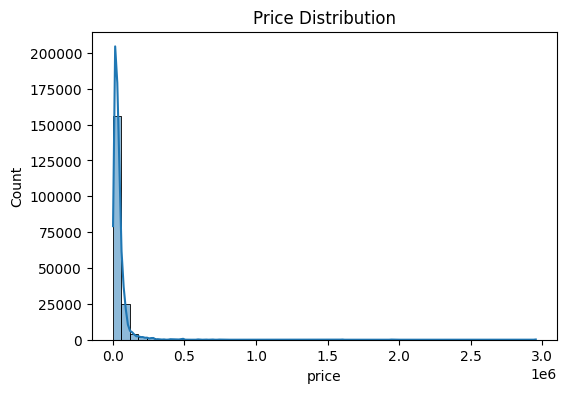

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

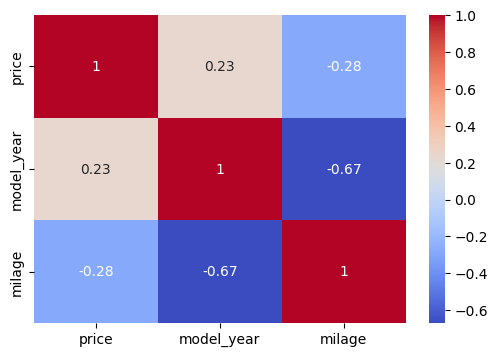

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["price","model_year","milage"]].corr(), annot=True, cmap="coolwarm")
plt.show()

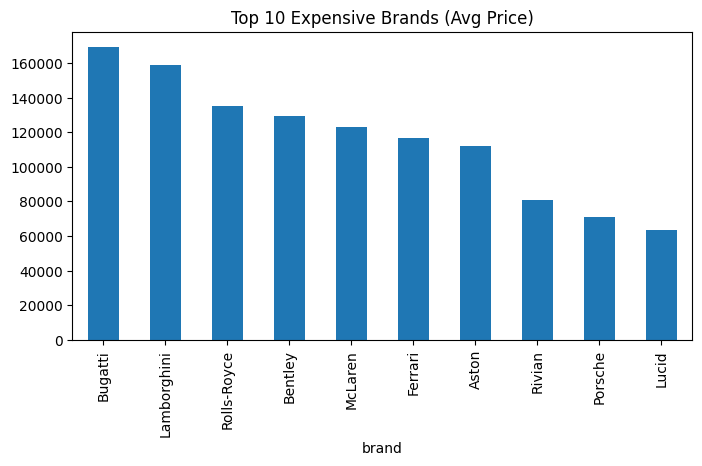

In [16]:
top_brands = df.groupby("brand")["price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
top_brands.plot(kind="bar")
plt.title("Top 10 Expensive Brands (Avg Price)")
plt.show()

## *FEATURE ENGINEERING + PREP PIPELINE*

In [17]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [18]:
df.drop("id", axis=1, inplace=True)

In [19]:
cat_cols = ["fuel_type", "accident", "clean_title"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
df["horsepower"] = df["engine"].str.extract(r"(\d+\.?\d*)HP").astype(float)

In [21]:
df.drop("engine", axis=1, inplace=True)

In [22]:
df["price"] = np.log1p(df["price"])

In [23]:
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [24]:
x = df.drop("price", axis=1)
y = df["price"]

print("Final Shape:", x.shape)

Final Shape: (188533, 11)


## *Modelling*

In [25]:
x = pd.get_dummies(x, drop_first=True)  
# Kategorik değişkenleri (örneğin 'zipcode') one-hot encoding yöntemiyle sayısal değerlere dönüştürür.  
# drop_first=True, çoklu doğrusal bağımlılığı (dummy trap) önlemek için ilk kategoriyi kaldırır.

In [26]:
 x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.20, random_state=42
    )

In [33]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pandas as pd
import numpy as np


def algo_test(X, y):
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    models = {
        "Linear": make_pipeline(
            SimpleImputer(strategy="median"),
            MinMaxScaler(),
            LinearRegression()
        ),
        "Ridge": make_pipeline(
            SimpleImputer(strategy="median"),
            MinMaxScaler(),
            Ridge()
        ),
        "Lasso": make_pipeline(
            SimpleImputer(strategy="median"),
            MinMaxScaler(),
            Lasso()
        ),
        "ElasticNet": make_pipeline(
            SimpleImputer(strategy="median"),
            MinMaxScaler(),
            ElasticNet()
        ),
        "GradientBoosting": make_pipeline(
            SimpleImputer(strategy="median"),
            GradientBoostingRegressor(random_state=42)
        ),
        "DecisionTree": make_pipeline(
            SimpleImputer(strategy="median"),
            DecisionTreeRegressor(random_state=42)
        ),
        "XGB": XGBRegressor(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            tree_method="hist",
            n_jobs=-1,
            verbosity=0
        )
    }

    results = []

    for name, model in models.items():

        scores = cross_val_score(
            model,
            X,
            y,
            cv=kf,
            scoring="neg_root_mean_squared_error",
            n_jobs=-1
        )

        rmse = -scores.mean()
        results.append([name, rmse])

    return pd.DataFrame(results, columns=["Model", "CV_RMSE"]).sort_values("CV_RMSE")


In [34]:
results = algo_test(x, y)
results

,Model,CV_RMSE
6,XGB,0.491092
4,GradientBoosting,0.505374
0,Linear,0.537039
1,Ridge,0.537039
5,DecisionTree,0.714753
2,Lasso,0.844171
3,ElasticNet,0.844171


## *Best Model*

In [35]:
# Final model
final_model = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist",
    n_jobs=-1,
    verbosity=0
)

In [36]:
final_model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=-1, num_parallel_tree=None, ...)

## *Save Model*

In [37]:
import joblib

# Modeli kaydet
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

In [38]:
# Feature listesini kaydet
joblib.dump(list(x.columns), "model_features.pkl")

['model_features.pkl']

# *✅ Final Model Summary*

- Best Model: **XGBoost**
- Cross Validation: 5-Fold KFold
- Evaluation Metric: RMSE
- Target Transformation: log1p(price)

---

## *📦 Saved Artifacts*

- `used_car_xgb_model.pkl`
- `used_car_features.pkl`
- `submission.csv`

---

## *🚀 Key Takeaways*

- Tree-based models significantly outperform linear models.
- Feature engineering (car_age, horsepower) improved performance.
- Proper CV setup prevents leakage.

---

Thank you for reading 🙌  
If you found this notebook useful, feel free to upvote ⭐
